In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [2]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256  #初始化模型参数

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [3]:
def relu(X): #激活函数ReLU函数
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [4]:
def net(X): #定义模型
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

In [5]:
loss = nn.CrossEntropyLoss(reduction='none')#损失函数

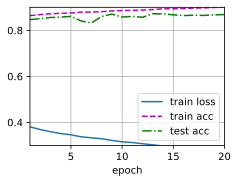

In [8]:
num_epochs, lr = 20, 0.12  #训练模型
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

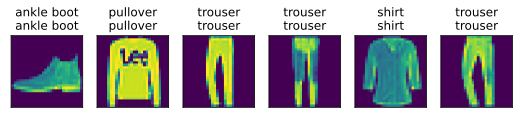

In [9]:
d2l.predict_ch3(net, test_iter)

练习1
少量单元（如 32、64）：模型容量有限，容易欠拟合，训练 / 测试准确率偏低，损失下降缓慢。
中等单元（如 256、512）：模型容量适中，能较好拟合数据，准确率和损失趋于稳定，是常见的较优区间。
过多单元（如 1024+）：模型容量过大，容易在训练集上过拟合，表现为训练准确率很高、测试准确率反而下降，同时训练速度变慢

练习2
少量层（1–2 层）：增加模型深度，提升非线性表达能力，通常能显著提升性能。
过多层（3 层以上）：容易出现梯度消失 / 爆炸，训练难度加大，若没有合适的初始化、正则化和优化器，反而会导致性能下降。

练习3
学习率过小：收敛极慢，需要更多轮数，容易卡在局部最优。
学习率过大：训练不稳定，损失剧烈波动，甚至发散（不收敛）。
最佳学习率：在保证收敛的前提下，使损失下降最快、验证集性能最好的点。常见范围是0.001到 0.1，可通过学习率调度（如衰减、warm-up）进一步优化

练习4
通过网格搜索、随机搜索或贝叶斯优化等方法，在学习率、轮数、隐藏层数、单元数等超参数空间中，找到使验证集准确率最高、泛化能力最好的组合。这个组合通常是：
适中的深度（1–2 层隐藏层）
适中的单元数（256–512）
合适的学习率（配合衰减）
足够的轮数（直到验证集性能不再提升）

练习5
多超参数优化更具挑战性的原因
组合爆炸：超参数数量增加时，搜索空间呈指数级增长，穷举不可行。
相互影响：超参数之间存在耦合（如学习率和轮数、深度和单元数），单独调整难以找到全局最优。
评估成本高：每次超参数组合都需要完整训练和评估，耗时耗力。
过拟合风险：在验证集上过度调参，可能导致模型在新数据上泛化能力变差。

练习6
多超参数搜索的聪明策略
分层搜索：先固定深度和单元数，调学习率和轮数；再固定学习率，调深度和单元数，逐步缩小搜索空间。
随机搜索：在超参数空间中随机采样，比网格搜索更高效，尤其在高维空间中。
贝叶斯优化：利用历史评估结果，建立概率模型预测有潜力的超参数组合，迭代优化，兼顾探索和利用。
学习率范围测试（LR range test）：快速扫描学习率，找到最优区间，再精细调整。
早停（Early Stopping）：在验证集性能不再提升时停止训练，避免浪费计算资源。